In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
import warnings
import seaborn
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('Train.csv')
df=df.drop(['Var_1','Segmentation'],axis=1) #Let's remove the unnecessary columns first 
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       7928 non-null object
Age                8068 non-null int64
Graduated          7990 non-null object
Profession         7944 non-null object
Work_Experience    7239 non-null float64
Spending_Score     8068 non-null object
Family_Size        7733 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 567.4+ KB


In [6]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [7]:
def null_values(field):
    return df[field].isnull().sum()
print("Missing Values :")
for i in df.columns:
    print(i+' : ',null_values(i))

Missing Values :
ID :  0
Gender :  0
Ever_Married :  140
Age :  0
Graduated :  78
Profession :  124
Work_Experience :  829
Spending_Score :  0
Family_Size :  335


In [8]:
Data_train=pd.read_csv("Train.csv").drop(columns=["ID"])
Data_test=pd.read_csv("Test.csv")

In [15]:
# How many unique values are in Columns of Data Train ?
listoftrain=[]
print("Total Train Data :",len(Data_train))
for i in Data_train.columns:
    print(f'{i}:',len(Data_train[i].unique()))
    print(f'{i} Nan Values: :',sum(Data_train[i].isna()))
    listoftrain.append(i)
    listoftrain.append(len(Data_train[i].unique()))
    listoftrain.append(sum(Data_train[i].isna()))
    if Data_train[i].dtype=="int64":
      print(f'{i} Mean:',Data_train[i].mean())
      listoftrain.append(Data_train[i].mean())
    else:
      print(f'{i} Mode:',Data_train[i].mode().values[0])
      listoftrain.append(Data_train[i].mode().values[0])

Train_data_result=pd.DataFrame(np.array(listoftrain).reshape((10,4)),columns=["Feature","Unique","NanValues","Mode"])

Total Train Data : 8068
Gender: 2
Gender Nan Values: : 0
Gender Mode: Male
Ever_Married: 3
Ever_Married Nan Values: : 140
Ever_Married Mode: Yes
Age: 67
Age Nan Values: : 0
Age Mean: 43.46690629647992
Graduated: 3
Graduated Nan Values: : 78
Graduated Mode: Yes
Profession: 10
Profession Nan Values: : 124
Profession Mode: Artist
Work_Experience: 16
Work_Experience Nan Values: : 829
Work_Experience Mode: 1.0
Spending_Score: 3
Spending_Score Nan Values: : 0
Spending_Score Mode: Low
Family_Size: 10
Family_Size Nan Values: : 335
Family_Size Mode: 2.0
Var_1: 8
Var_1 Nan Values: : 76
Var_1 Mode: Cat_6
Segmentation: 4
Segmentation Nan Values: : 0
Segmentation Mode: D


In [16]:
listoftest=[]
print("Total Test Data :",len(Data_test))
for i in Data_test.columns:
    print(f'{i}:',len(Data_test[i].unique()))
    print(f'{i} Nan Values: :',sum(Data_test[i].isna()))
    listoftest.append(i)
    listoftest.append(len(Data_test[i].unique()))
    listoftest.append(sum(Data_test[i].isna()))
    if Data_test[i].dtype=="int64":
      print(f'{i} Mean:',Data_test[i].mean())
      listoftest.append(Data_test[i].mean())
    else:
      print(f'{i} Mode:',Data_test[i].mode().values[0])
      listoftest.append(Data_test[i].mode().values[0])

Test_data_result=pd.DataFrame(np.array(listoftest).reshape((10,4)),columns=["Feature","Unique","NanValues","Mode"])

Total Test Data : 2627
ID: 2627
ID Nan Values: : 0
ID Mean: 463433.91891891893
Gender: 2
Gender Nan Values: : 0
Gender Mode: Male
Ever_Married: 3
Ever_Married Nan Values: : 50
Ever_Married Mode: Yes
Age: 67
Age Nan Values: : 0
Age Mean: 43.649790635706125
Graduated: 3
Graduated Nan Values: : 24
Graduated Mode: Yes
Profession: 10
Profession Nan Values: : 38
Profession Mode: Artist
Work_Experience: 16
Work_Experience Nan Values: : 269
Work_Experience Mode: 1.0
Spending_Score: 3
Spending_Score Nan Values: : 0
Spending_Score Mode: Low
Family_Size: 10
Family_Size Nan Values: : 113
Family_Size Mode: 2.0
Var_1: 8
Var_1 Nan Values: : 32
Var_1 Mode: Cat_6


In [17]:
pd.concat([Train_data_result,Test_data_result],axis=1)

,Feature,Unique,NanValues,Mode,Feature,Unique,NanValues,Mode
0,Gender,2,0,Male,ID,2627,0,463433.91891891893
1,Ever_Married,3,140,Yes,Gender,2,0,Male
2,Age,67,0,43.46690629647992,Ever_Married,3,50,Yes
3,Graduated,3,78,Yes,Age,67,0,43.649790635706125
4,Profession,10,124,Artist,Graduated,3,24,Yes
5,Work_Experience,16,829,1.0,Profession,10,38,Artist
6,Spending_Score,3,0,Low,Work_Experience,16,269,1.0
7,Family_Size,10,335,2.0,Spending_Score,3,0,Low
8,Var_1,8,76,Cat_6,Family_Size,10,113,2.0
9,Segmentation,4,0,D,Var_1,8,32,Cat_6


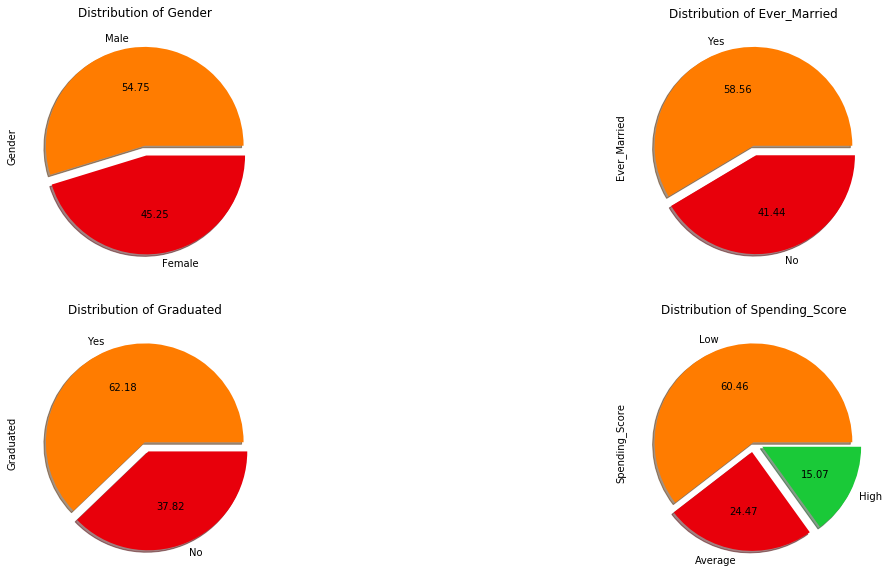

In [18]:
f, ax  = plt.subplots(2,2,figsize = (20,10))
colors=["#FF7C00", "#E8000B","#1AC938"]
Data_train['Gender'].value_counts().plot.pie(title='Distribution of Gender',explode=[0,.1],
                                           ax=ax[0][0],autopct="%.2f",shadow = True,colors = colors)

Data_train['Ever_Married'].value_counts().plot.pie(title='Distribution of Ever_Married',explode=[0,.1],
                                                 ax=ax[0][1],autopct="%.2f",shadow = True,colors = colors)

Data_train['Graduated'].value_counts().plot.pie(title='Distribution of Graduated',explode=[0,.1],
                                              ax=ax[1][0],autopct="%.2f",shadow = True,colors = colors)

Data_train['Spending_Score'].value_counts().plot.pie(title='Distribution of Spending_Score',
                                                   ax=ax[1][1],explode=[0,.1,.1],autopct="%.2f",shadow = True,colors=colors)
f.patch.set_facecolor('white')
plt.show()

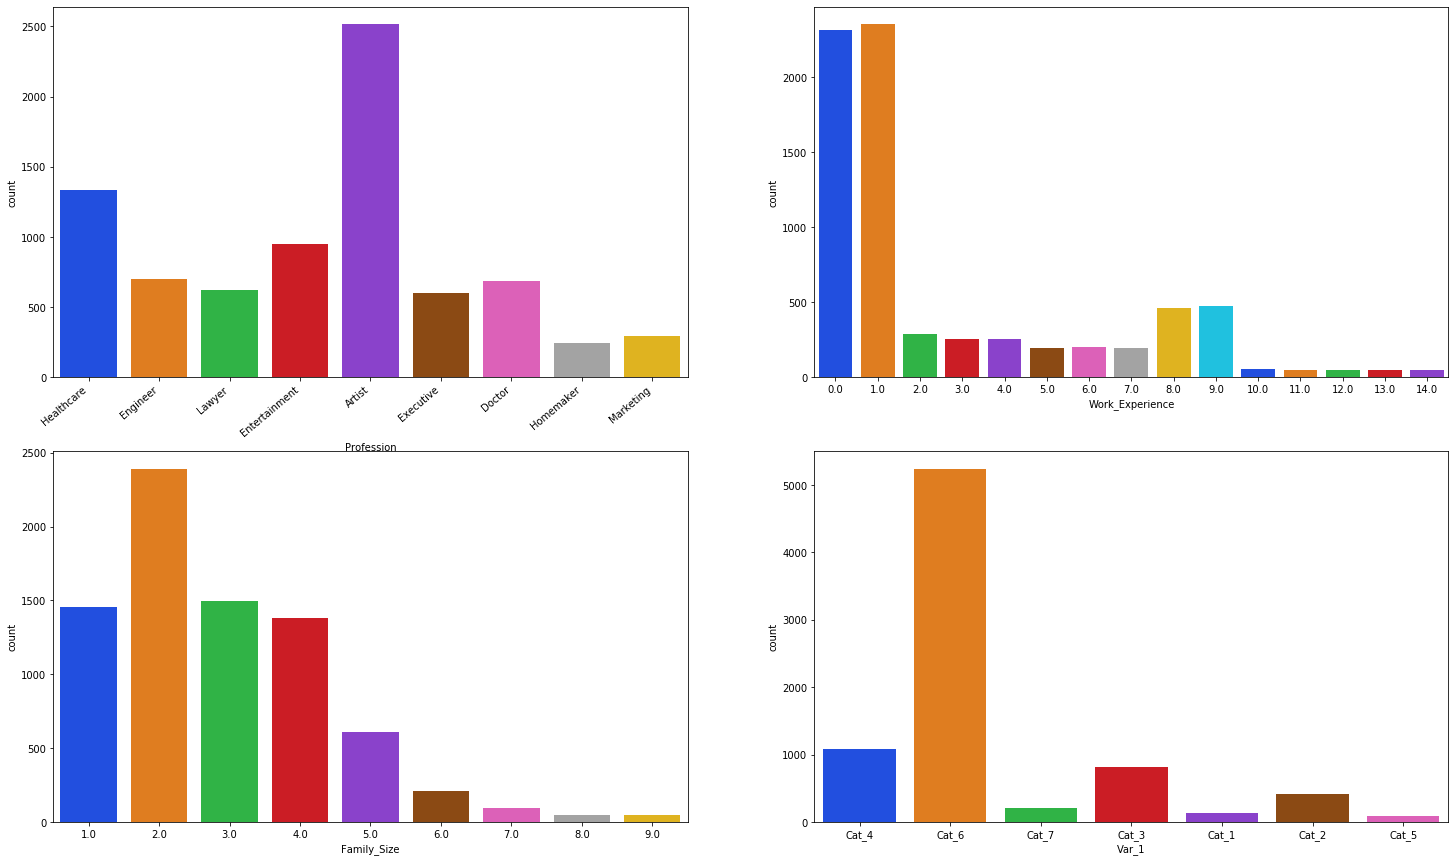

In [19]:
f, ax  = plt.subplots(2,2,figsize = (25,15))
colors=["#023EFF","#FF7C00", "#E8000B","#1AC938"]
labels = ["D","C","A","B"]

ax1 = sns.countplot(Data_train['Profession'],ax=ax[0][0],palette = "bright")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

sns.countplot(Data_train['Work_Experience'],ax=ax[0][1],palette = "bright")
sns.countplot(Data_train['Family_Size'],ax=ax[1][0],palette = "bright")
sns.countplot(Data_train['Var_1'],ax=ax[1][1],palette = "bright")
plt.show()


In [20]:
for i in Data_train.columns:
  if sum(Data_train[i].isna())!=0:
    Data_train[i+"_add_val"]=Data_train[i].isna()
    if i!=["Age","Work_Experience","Family_Size"]:
      Data_train[i]=Data_train[i].fillna(Data_train[i].mode().values[0])
    else:
      Data_train[i]=Data_train[i].fillna(Data_train[i].mean())

In [21]:
for i in Data_test.columns:
  if sum(Data_test[i].isna())!=0:
    Data_test[i+"_add_val"]=Data_test[i].isna()
    if i!=["Age","Work_Experience","Family_Size"]:
      Data_test[i]=Data_test[i].fillna(Data_test[i].mode().values[0])
    else:
      Data_test[i]=Data_test[i].fillna(Data_test[i].mean())

In [22]:
Data_train["Gender"]=pd.get_dummies(Data_train["Gender"],drop_first=True)
Data_train["Ever_Married"]=pd.get_dummies(Data_train["Ever_Married"],drop_first=True)
Data_train["Graduated"]=pd.get_dummies(Data_train["Graduated"],drop_first=True)
Data_train["Ever_Married_add_val"]=pd.get_dummies(Data_train["Ever_Married_add_val"],drop_first=True)
Data_train["Graduated_add_val"]=pd.get_dummies(Data_train["Graduated_add_val"],drop_first=True)
Data_train["Profession_add_val"]=pd.get_dummies(Data_train["Profession_add_val"],drop_first=True)
Data_train["Work_Experience_add_val"]=pd.get_dummies(Data_train["Work_Experience_add_val"],drop_first=True)
Data_train["Family_Size_add_val"]=pd.get_dummies(Data_train["Family_Size_add_val"],drop_first=True)
Data_train["Var_1_add_val"]=pd.get_dummies(Data_train["Var_1_add_val"],drop_first=True)

In [23]:
new_Data_train=pd.concat([Data_train,pd.get_dummies(Data_train["Profession"],drop_first=True),pd.get_dummies(Data_train["Spending_Score"],drop_first=True),pd.get_dummies(Data_train["Var_1"],drop_first=True)],axis=1)
new_Data_train=new_Data_train.drop(columns=["Profession","Spending_Score","Var_1"])
new_Data_train

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Ever_Married_add_val,Graduated_add_val,Profession_add_val,...,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,1,0,22,0,1.0,4.0,D,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,38,1,1.0,3.0,A,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,1.0,B,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,1,67,1,0.0,2.0,B,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0,1,40,1,1.0,6.0,A,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,1,1,56,0,0.0,2.0,C,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,0,32,1,1.0,3.0,C,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,33,1,1.0,3.0,D,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0,1,61,1,0.0,3.0,D,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,0,1,55,1,1.0,4.0,C,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
Data_test["Gender"]=pd.get_dummies(Data_test["Gender"],drop_first=True)
Data_test["Ever_Married"]=pd.get_dummies(Data_test["Ever_Married"],drop_first=True)
Data_test["Graduated"]=pd.get_dummies(Data_test["Graduated"],drop_first=True)
Data_test["Ever_Married_add_val"]=pd.get_dummies(Data_test["Ever_Married_add_val"],drop_first=True)
Data_test["Graduated_add_val"]=pd.get_dummies(Data_test["Graduated_add_val"],drop_first=True)
Data_test["Profession_add_val"]=pd.get_dummies(Data_test["Profession_add_val"],drop_first=True)
Data_test["Work_Experience_add_val"]=pd.get_dummies(Data_test["Work_Experience_add_val"],drop_first=True)
Data_test["Family_Size_add_val"]=pd.get_dummies(Data_test["Family_Size_add_val"],drop_first=True)
Data_test["Var_1_add_val"]=pd.get_dummies(Data_test["Var_1_add_val"],drop_first=True)

In [25]:
new_Data_test=pd.concat([Data_test,pd.get_dummies(Data_test["Profession"],drop_first=True),pd.get_dummies(Data_test["Spending_Score"],drop_first=True),pd.get_dummies(Data_test["Var_1"],drop_first=True)],axis=1)
new_Data_test=new_Data_test.drop(columns=["Profession","Spending_Score","Var_1"])
new_Data_test

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Ever_Married_add_val,Graduated_add_val,Profession_add_val,...,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,458989,0,1,36,1,0.0,1.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,458994,1,1,37,1,8.0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,458996,0,1,69,0,0.0,1.0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,459000,1,1,59,0,11.0,2.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,459001,0,0,19,0,1.0,4.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,459003,1,1,47,1,0.0,5.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6,459005,1,1,61,1,5.0,3.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,459008,0,1,47,1,1.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,459013,1,1,50,1,2.0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,459014,1,0,19,0,0.0,4.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [27]:
x=new_Data_train.copy().drop(columns=['Segmentation']).values
y=new_Data_train['Segmentation'].values
y=LabelEncoder().fit_transform(y)
map={3:"D",0:"A",1:"B",2:"C"}

In [28]:
print('Train_x:',x.shape)
print('Train_y:',y.shape)

Train_x: (8068, 28)
Train_y: (8068,)


In [29]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(learning_rate=0.1,n_jobs=-1,random_state=42,max_depth=15,n_estimators=1000,objective="multi:softproba")
model_xgb.fit(x,y)
print(model_xgb.score(x,y))

0.960213187902826


In [30]:
print(classification_report(y,model_xgb.predict(x)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1972
           1       0.94      0.94      0.94      1858
           2       0.95      0.95      0.95      1970
           3       0.98      0.99      0.98      2268

    accuracy                           0.96      8068
   macro avg       0.96      0.96      0.96      8068
weighted avg       0.96      0.96      0.96      8068

